In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#First check out the data
data = pd.read_csv("data.csv",delimiter=';')

In [3]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
data.shape

(70000, 13)

In [5]:
#cardio 0 denotes does not have cardiovascular disease, 1 denotes has cardio disease
data["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [6]:
data.groupby("cardio").mean() #this does not give me anythin about in terms of gender,cholestrol,smoke

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49862.869107,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,50082.102233,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [7]:
#age 51 54 /height not useful/weight not useful/ ap_hi and ap_lo look useful/ others ordinal or categorical values
data.groupby("cardio").apply(lambda x: x.iloc[0:1,0:12].mode())

,,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,,
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,0,1,20228,1,156,85.0,140,90,3,1,0,0,1


In [8]:

data.groupby(['cardio', 'gender']).size()

cardio  gender
0       1         22914
        2         12107
1       1         22616
        2         12363
dtype: int64

<Axes: xlabel='cardio'>

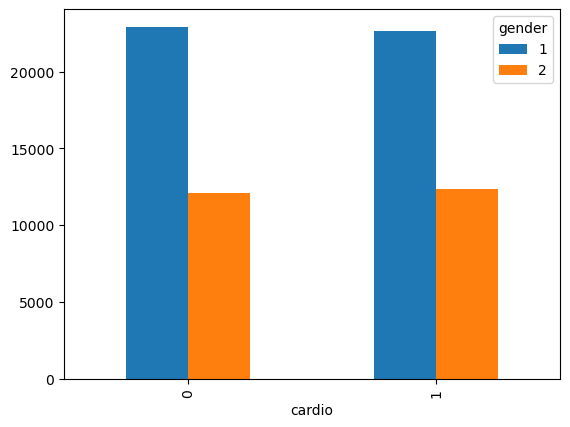

In [9]:
pd.crosstab(data["cardio"],data["gender"]).plot(kind="bar") # does not mean anything proportionally, men are already twice as numerous as women

<Axes: xlabel='smoke'>

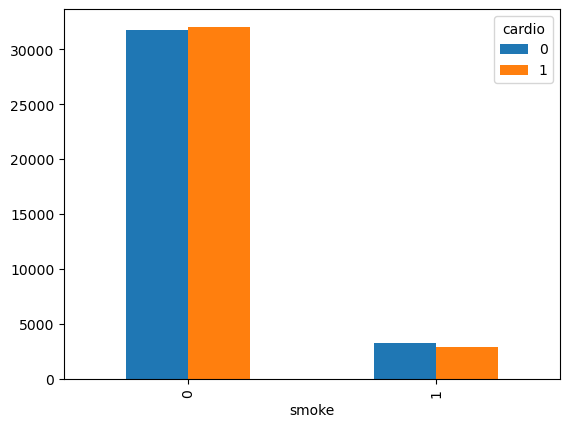

In [10]:
pd.crosstab(data["smoke"],data["cardio"]).plot(kind="bar") #this did not give a meaningful outcome shockingly

<Axes: xlabel='cholesterol'>

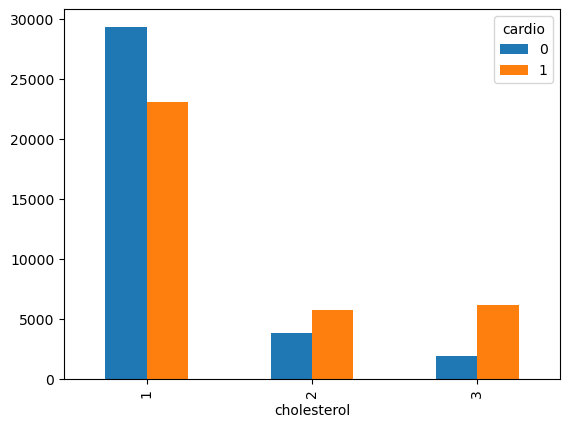

In [11]:
pd.crosstab(data["cholesterol"],data["cardio"]).plot(kind="bar") #as cholesterol increases, sick people start to become more than non-sick people

<Axes: xlabel='gluc'>

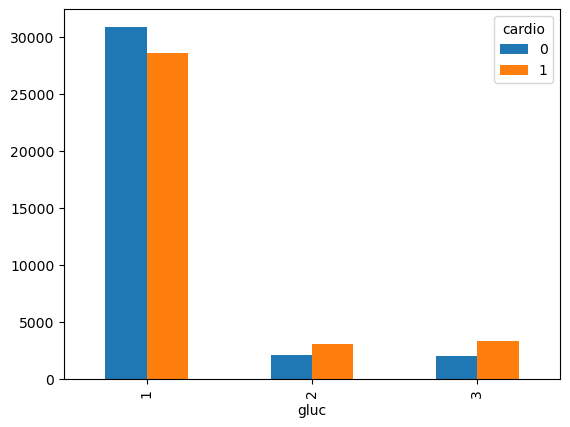

In [12]:
pd.crosstab(data["gluc"],data["cardio"]).plot(kind="bar")   #as glucose increases, sick people start to become more than non-sick people

<Axes: xlabel='alco'>

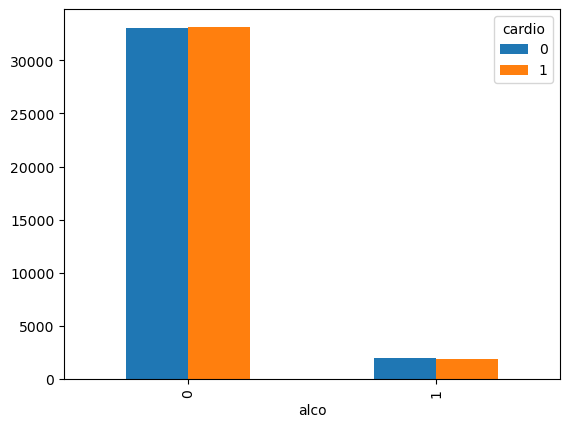

In [13]:
pd.crosstab(data["alco"],data["cardio"]).plot(kind="bar") 

<Axes: xlabel='active'>

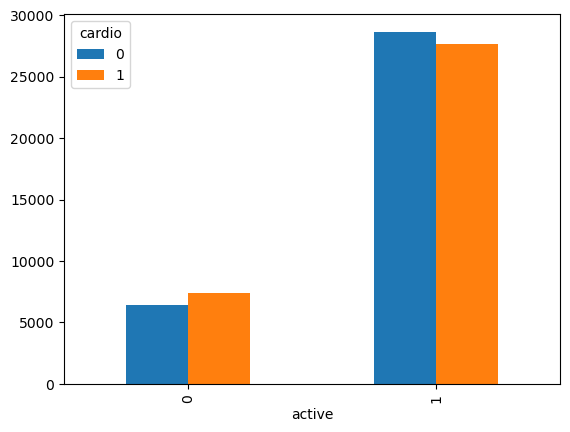

In [14]:
pd.crosstab(data["active"],data["cardio"]).plot(kind="bar") # people who are physically active have less cardio disease

In [15]:
data.isnull().sum() # there is no nan values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [16]:
#data is already encoded no need for encoding(Cholesterol,Glucose,Smoking,Alcohol Intake,physical activity)
# I will use the 5 features ap_low, ap_high,cholestrol,glucose,active
X= data[['ap_lo', 'ap_hi','cholesterol','gluc','active']]

In [17]:
X

,ap_lo,ap_hi,cholesterol,gluc,active
0,80,110,1,1,1
1,90,140,3,1,1
2,70,130,3,1,0
3,100,150,1,1,1
4,60,100,1,1,0
...,...,...,...,...,...
69995,80,120,1,1,1
69996,90,140,2,2,1
69997,90,180,3,1,0
69998,80,135,1,2,0


In [18]:
Y = data['cardio']

In [19]:
Y.shape

(70000,)

In [20]:
#For my first approach I will use Logistic Regression
#Split training data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=1234)

In [21]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
myscaler=StandardScaler()

In [22]:
x_train_std=myscaler.fit_transform(x_train)
x_test_std=myscaler.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression(C=1)
model.fit(x_train_std,y_train)
model.predict(x_test_std)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [25]:
model.score(x_test_std, y_test)

0.7153333333333334

In [26]:
#Now I will tune the hyper-parameter C
from sklearn.metrics import accuracy_score
weights, params, accuracies =[],[],[]
for c in np.arange(-5,5):
    lr=LogisticRegression(C=10.0**c,random_state=1234)
    lr.fit(x_train_std,y_train)
    weights.append(lr.coef_)
    #print(lr.coef_)
    params.append(10.0**c)
    accuracies.append(accuracy_score(y_test,lr.predict(x_test_std)))

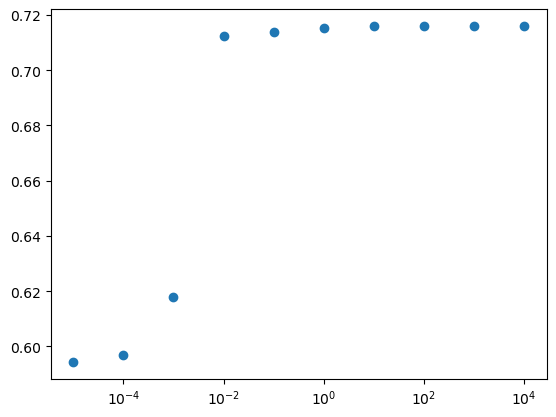

In [27]:
plt.scatter(params,accuracies)
plt.xscale('log')
plt.show()

In [28]:
# The C=1 value looks the best option among these so we stick to that
# Performance of logistic Regression
from sklearn.metrics import accuracy_score, recall_score,precision_score,fbeta_score, f1_score

In [29]:
logistic_preds = model.predict(x_test_std) 
logistic_precision =precision_score(y_test,logistic_preds)
logistic_recall =recall_score(y_test,logistic_preds)
logistic_accuracy =accuracy_score(y_test,logistic_preds)
logistic_f1 = f1_score(y_test,logistic_preds)
logistic_f2 = fbeta_score(y_test,logistic_preds, beta=2)

print('Precision score: ',logistic_precision)
print('Recall score: ',logistic_recall)
print('Accuracy score: ',logistic_accuracy)
print('F1 score: ',logistic_f1)
# Since our false negatives are mor important  β > 1 , recall over precision
print('Fbeta score: ',logistic_f2)

Precision score:  0.7594685934040322
Recall score:  0.6247723132969034
Accuracy score:  0.7153333333333334
F1 score:  0.6855670103092784
Fbeta score:  0.6477487327303448


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74     10569
           1       0.76      0.62      0.69     10431

    accuracy                           0.72     21000
   macro avg       0.72      0.71      0.71     21000
weighted avg       0.72      0.72      0.71     21000



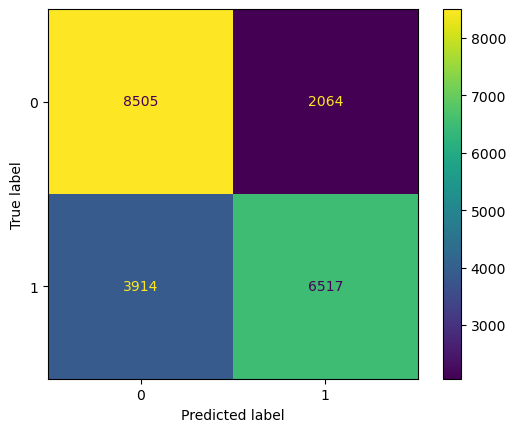

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, logistic_preds))
disp.plot()

In [32]:
import time
# Measure computational
start_time = time.time()
model.fit(x_train_std,y_train)
logistic_fitting_time = time.time()-start_time
print(f"Fitting the model took {logistic_fitting_time:.4f} seconds")
start_time = time.time()
model.predict(x_test_std)
logistic_predicting_time = time.time()-start_time
print(f"Predicting took {logistic_predicting_time:.4f} seconds")

Fitting the model took 0.0590 seconds
Predicting took 0.0000 seconds


In [33]:
#Plot the ROC curve
logistic_prob = model.predict_proba(x_test_std)
logistic_prob_positives = logistic_prob[:,1]

from sklearn.metrics import roc_auc_score, roc_curve
lr_fpr,lr_tpr,lr_treshold=roc_curve(y_test,logistic_prob_positives)
lr_treshold

array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
       2.98458278e-03, 1.69000964e-05, 1.57360426e-06])

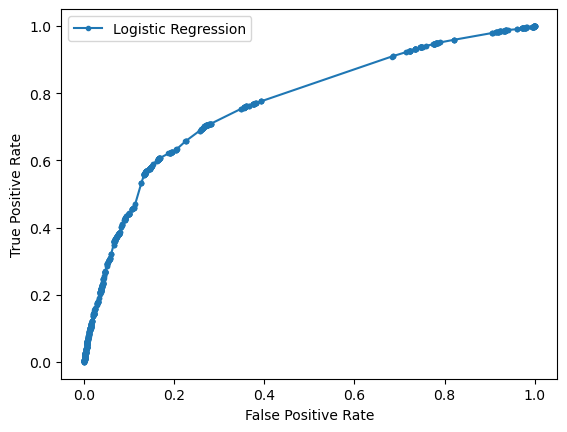

In [34]:
plt.plot(lr_fpr, lr_tpr, marker='.', label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [35]:
roc_auc_score(y_test,logistic_prob_positives)

0.7692247417595965

In [36]:
#Second Classification Approach : Decision tree
#No need to normalize data
#I will use the GridSearch to tune the hyper-parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
mytree=DecisionTreeClassifier( random_state=1234)

In [38]:
grid_params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,3,5,7,9]
}
grid_search = GridSearchCV(mytree,grid_params, verbose=1, cv =5, n_jobs = -1)

In [39]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 9]},
             verbose=1)

In [40]:
grid_search.fit(x_train_std,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 9]},
             verbose=1)

In [41]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=1234)

In [42]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [43]:
grid_search.best_score_

0.7265918367346937

In [44]:
grid_search.cv_results_.get("mean_test_score")

array([0.72659184, 0.72659184, 0.72544898, 0.72491837, 0.72457143,
       0.72659184, 0.72659184, 0.72555102, 0.72477551, 0.72434694,
       0.72659184, 0.72659184, 0.72555102, 0.72477551, 0.72434694])

In [45]:
grid_search.cv_results_.get("params")

[{'criterion': 'gini', 'max_depth': 2},
 {'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 9},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 9},
 {'criterion': 'log_loss', 'max_depth': 2},
 {'criterion': 'log_loss', 'max_depth': 3},
 {'criterion': 'log_loss', 'max_depth': 5},
 {'criterion': 'log_loss', 'max_depth': 7},
 {'criterion': 'log_loss', 'max_depth': 9}]

In [47]:
mytree_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth=2,random_state=1234)

In [48]:
mytree_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1234)

In [49]:
mytree_tuned.predict(x_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [50]:
#Performance analyses
from sklearn.metrics import classification_report
print(classification_report(y_test, mytree_tuned.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10569
           1       0.75      0.68      0.71     10431

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



In [51]:
tree_preds = mytree_tuned.predict(x_test)
tree_precision =precision_score(y_test,tree_preds)
tree_recall =recall_score(y_test,tree_preds)
tree_accuracy =accuracy_score(y_test,tree_preds)
tree_f1 = f1_score(y_test,tree_preds)
tree_f2 = fbeta_score(y_test,tree_preds, beta=2)

print('Precision score: ',tree_precision)
print('Recall score: ',tree_recall)
print('Accuracy score: ',tree_accuracy)
print('F1 score: ',tree_f1)
# Since our false negatives are mor important  β > 1 , recall over precision
print('Fbeta score: ',tree_f2)

Precision score:  0.7451582178008255
Recall score:  0.6750071901064135
Accuracy score:  0.7239047619047619
F1 score:  0.7083501006036217
Fbeta score:  0.6879604478924431


In [52]:
import time
# Measure computational
start_time = time.time()
mytree_tuned.fit(x_train,y_train)
tree_fitting_time = time.time()-start_time
print(f"Fitting the model took {tree_fitting_time:.4f} seconds")

start_time = time.time()
mytree_tuned.predict(x_test)
tree_predicting_time = time.time()-start_time
print(f"Predicting took {tree_predicting_time:.4f} seconds")

Fitting the model took 0.0120 seconds
Predicting took 0.0020 seconds


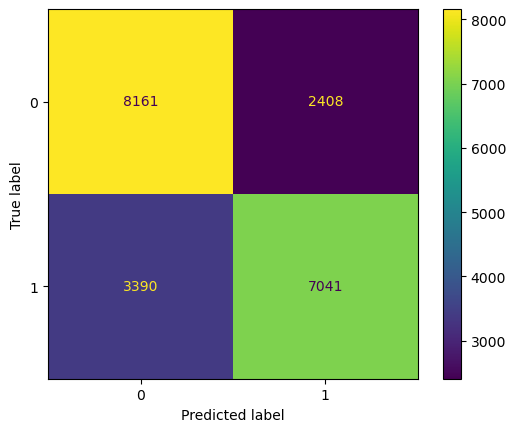

In [53]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, mytree_tuned.predict(x_test)))
disp.plot()

In [54]:
from sklearn.tree import export_graphviz
export_graphviz(mytree_tuned, out_file="mytree.dot", feature_names=X.columns)

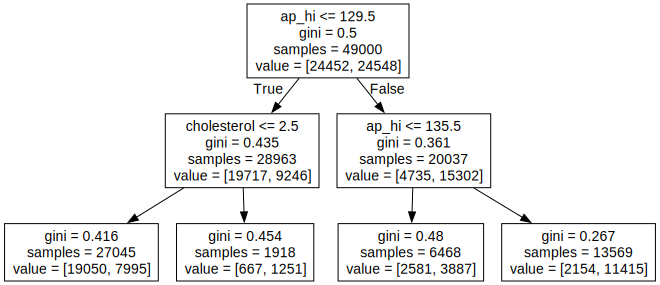

In [55]:
from sklearn.tree import export_graphviz
import graphviz

with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [56]:
#As my third classification approach I will try KNN Classifier
#I will also use gridsearch to tune the parameters
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn =  KNeighborsClassifier()
grid_params = {"n_neighbors":[3,5,7,11,19],
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan","minkowski"]}
grid_search = GridSearchCV(knn,grid_params, verbose=1, cv =5, n_jobs = -1)

In [58]:
start_time = time.time()
grid_search.fit(x_train_std,y_train)
fitting_time = time.time()-start_time
fitting_time   #takes too much time

Fitting 5 folds for each of 30 candidates, totalling 150 fits


42.256537675857544

In [59]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}

In [60]:
grid_search.best_score_

0.7002244897959183

In [61]:
grid_search.cv_results_.get("mean_test_score")

array([0.66663265, 0.66602041, 0.68210204, 0.68093878, 0.68885714,
       0.68708163, 0.69867347, 0.69677551, 0.70022449, 0.69816327,
       0.66695918, 0.66614286, 0.68238776, 0.68089796, 0.68904082,
       0.68720408, 0.69869388, 0.69695918, 0.70014286, 0.6982449 ,
       0.66663265, 0.66602041, 0.68210204, 0.68093878, 0.68885714,
       0.68708163, 0.69867347, 0.69677551, 0.70022449, 0.69816327])

In [62]:
grid_search.cv_results_.get("params")

[{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'},

In [63]:
myknn = KNeighborsClassifier(n_neighbors = 19, metric ="euclidean",weights="uniform")
myknn.fit(x_train_std,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [64]:
myknn.predict(x_test_std)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [65]:
#Performance analyses
from sklearn.metrics import classification_report
print(classification_report(y_test, mytree_tuned.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10569
           1       0.75      0.68      0.71     10431

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



In [66]:
knn_preds = myknn.predict(x_test_std)
knn_precision =precision_score(y_test,knn_preds)
knn_recall =recall_score(y_test,knn_preds)
knn_accuracy =accuracy_score(y_test,knn_preds)
knn_f1 = f1_score(y_test,knn_preds)
knn_f2 = fbeta_score(y_test,knn_preds, beta=2)

print('Precision score: ',knn_precision)
print('Recall score: ',knn_recall)
print('Accuracy score: ',knn_accuracy)
print('F1 score: ',knn_f1)
print('Fbeta score: ',knn_f2)

Precision score:  0.7337235571986034
Recall score:  0.6849774709999041
Accuracy score:  0.720047619047619
F1 score:  0.7085130646040954
Fbeta score:  0.6942015467723758


In [67]:
import time
# Measure computational
start_time = time.time()
myknn.fit(x_train_std,y_train)
knn_fitting_time = time.time()-start_time
print(f"Fitting the model took {knn_fitting_time:.4f} seconds")

start_time = time.time()
myknn.predict(x_test_std)
knn_predicting_time = time.time()-start_time
print(f"Predicting took {knn_predicting_time:.4f} seconds")

Fitting the model took 0.0780 seconds
Predicting took 2.4185 seconds


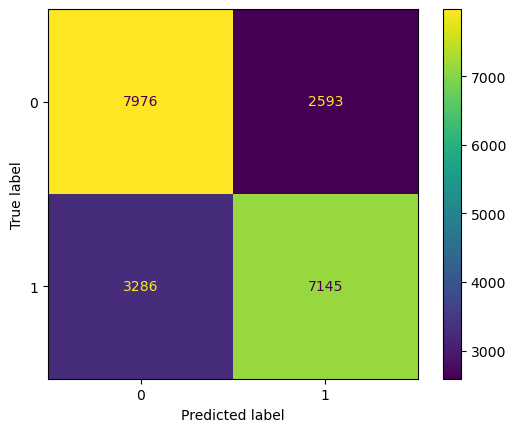

In [68]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,knn_preds ))
disp.plot()

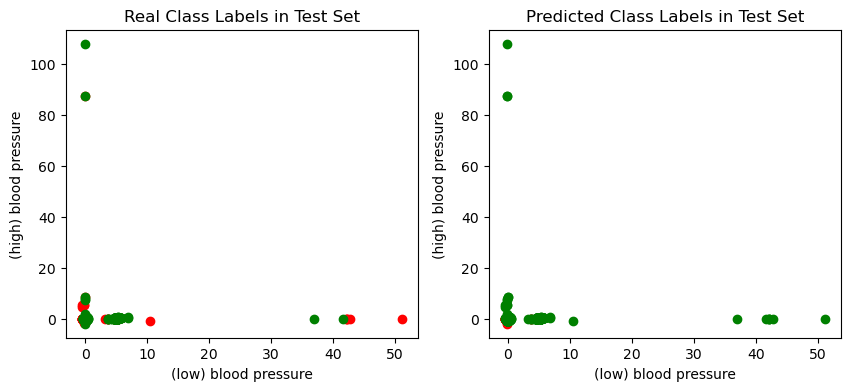

In [69]:
classIndex=[0,1]
colors=["red","green"]
plt.figure(figsize=(10,4))
plt.subplot(1, 2,1)
plt.title("Real Class Labels in Test Set")
plt.xlabel("(low) blood pressure")
plt.ylabel("(high) blood pressure")

for target, color in zip(classIndex, colors):
    index=target==y_test
    plt.scatter(x_test_std[index,0],x_test_std[index,1], c=color)

plt.subplot(1, 2,2)
plt.title("Predicted Class Labels in Test Set")
plt.xlabel("(low) blood pressure")
plt.ylabel("(high) blood pressure")

for target, color in zip(classIndex, colors):
    index=target==myknn.predict(x_test_std)
    plt.scatter(x_test_std[index,0],x_test_std[index,1], c=color)
    
plt.show()

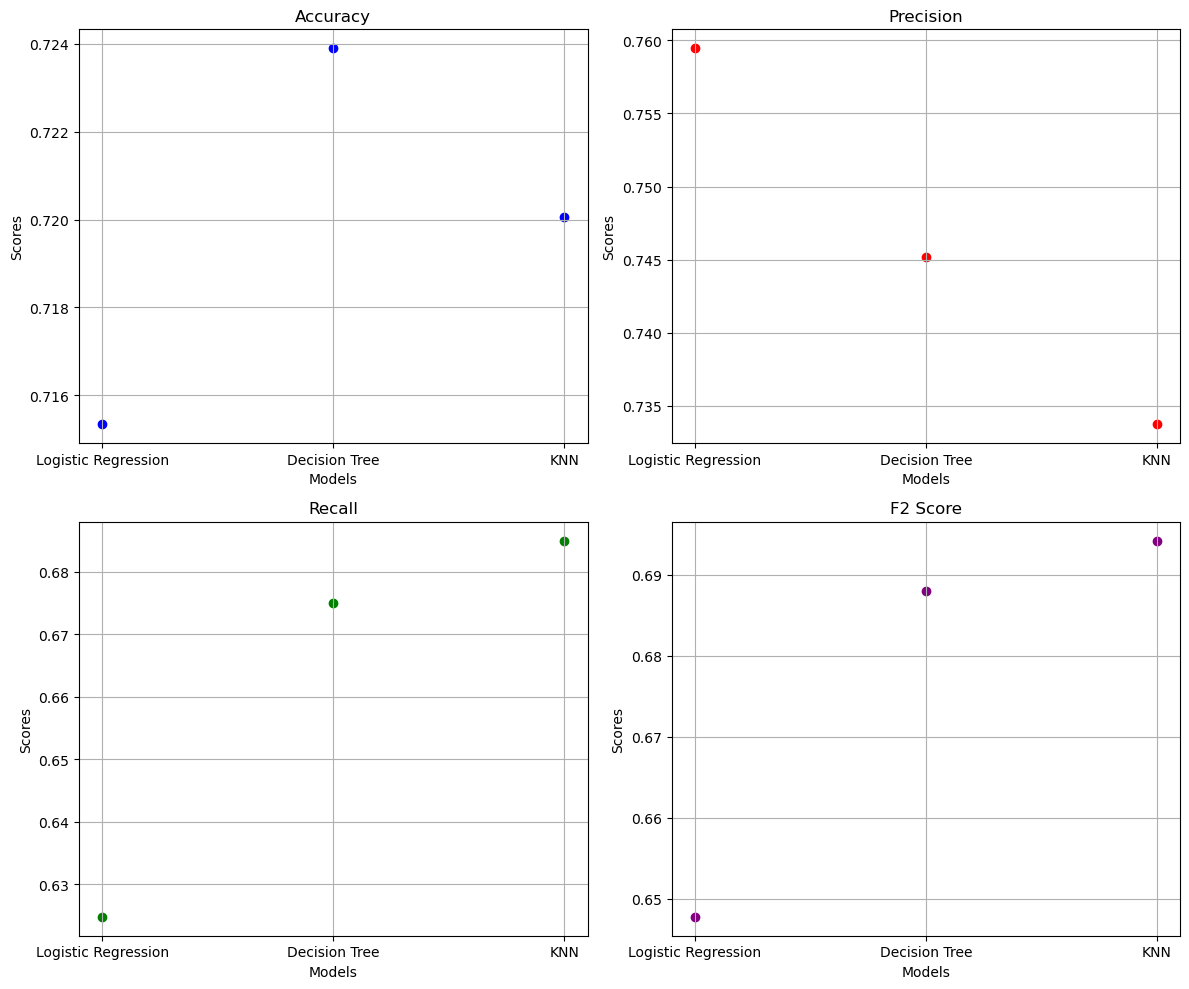

In [70]:
# Comparison of three models' performances
accuracies = [logistic_accuracy, tree_accuracy, knn_accuracy]
precisions = [logistic_precision, tree_precision, knn_precision]
recalls = [logistic_recall, tree_recall, knn_recall]
f2_scores = [logistic_f2, tree_f2, knn_f2]

models = ['Logistic Regression', 'Decision Tree', 'KNN']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(models, accuracies, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 1].scatter(models, precisions, color='red')
axs[0, 1].set_title('Precision')
axs[1, 0].scatter(models, recalls, color='green')
axs[1, 0].set_title('Recall')
axs[1, 1].scatter(models, f2_scores, color='purple')
axs[1, 1].set_title('F2 Score')

for ax in axs.flat:
    ax.set(xlabel='Models', ylabel='Scores')
    ax.grid(True)

plt.tight_layout()
plt.show()

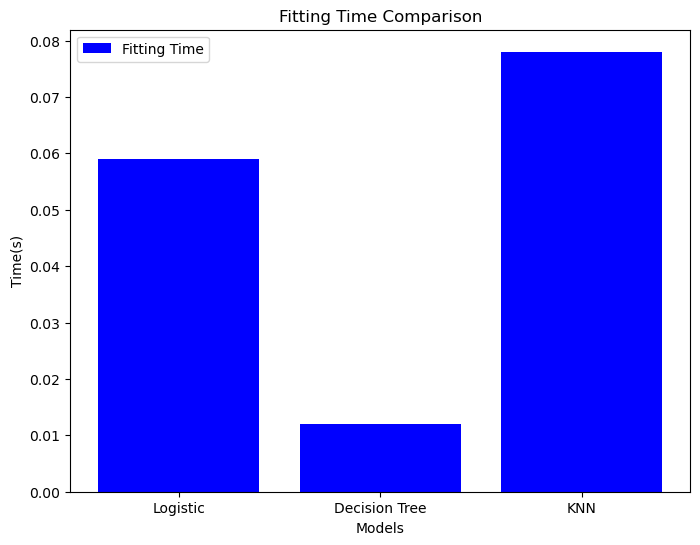

In [71]:
#Computational times comparison
fitting_times = np.array([logistic_fitting_time,tree_fitting_time,knn_fitting_time])
models = ["Logistic","Decision Tree","KNN"]
plt.figure(figsize=(8,6))
plt.title("Fitting Time Comparison")
plt.xlabel("Models")
plt.ylabel("Time(s)")
plt.bar(models,fitting_times, color="blue", label="Fitting Time"  )
plt.legend()
plt.show()

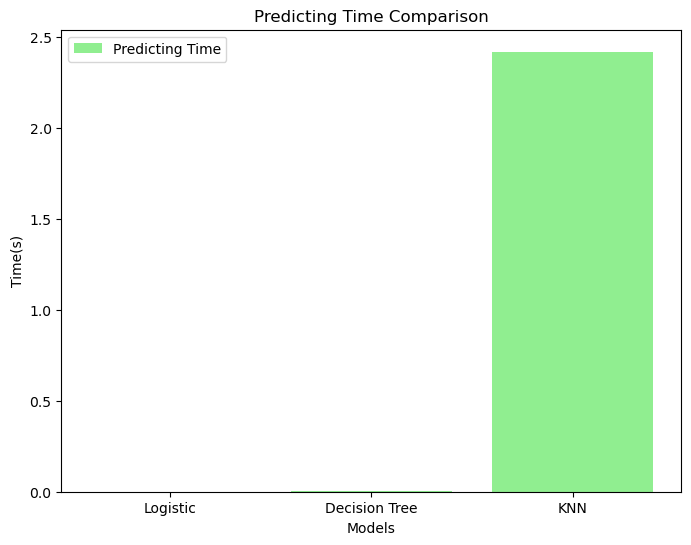

In [72]:
predicting_times = np.array([logistic_predicting_time,tree_predicting_time,knn_predicting_time])
plt.figure(figsize=(8,6))
plt.title("Predicting Time Comparison")
plt.xlabel("Models")
plt.ylabel("Time(s)")
plt.bar(models,predicting_times, color="lightgreen", label="Predicting Time"  )
plt.legend()
plt.show()

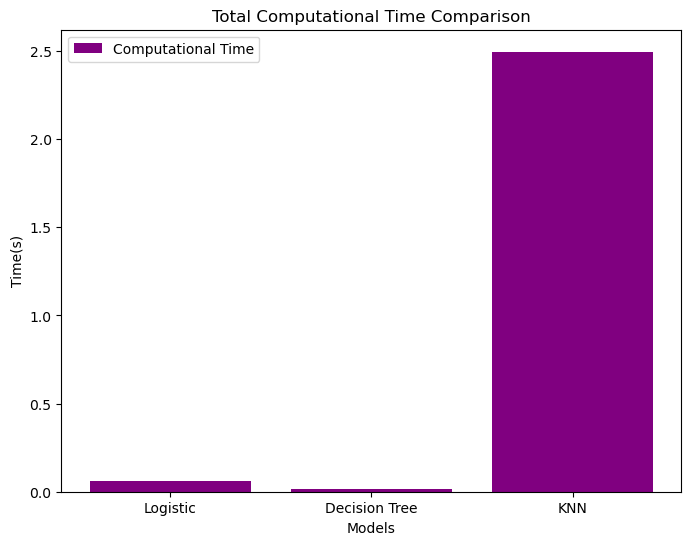

In [73]:
total_times = fitting_times+predicting_times
plt.figure(figsize=(8,6))
plt.title("Total Computational Time Comparison")
plt.xlabel("Models")
plt.ylabel("Time(s)")
plt.bar(models,total_times, color="purple", label="Computational Time"  )
plt.legend()
plt.show()